In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

## The Single Lens Model

To determine the configuration of an event's lens, one must essentially consider models of all possible lens-source configurations and see which ones "match" the observed lightcurve. The collective wisdom of the microlensing community allows for some short cuts in this process. For example, it is atypical to need to consider configuration options beyond a single-lens (SL) system with a single source star (1L1S), a SL system with two contributing source stars (1L2S), or a binary-lens (BL) system with a single source star (2L1S). Considering a higher number of lens objects before thoroughly investigating single- and binary-lensing options has been a pitfall of microlensing in its infancy \citep{Han2021, Han2016_Udalski20153L, Udalski20153L, Albrow2000, Jung2013_Albrow2000}. Additionally, past experience has informed the notion that dramatic perturbations on the Paczy{\'n}ski curve are caused by caustic crossings, which only exist in multiple-lens events. 

This section discusses the first point of call for microlensing event modelling; the 1L1S model and the it's parameterisations.

> In addition to this standard model, there are higher-order effects of situational importance, which are discussed in the [Higher Order](HighOrder.ipynb) notebook. The additional affects discussed in that notebbok include:
> + lens orbital motion,
> + parallax,
> + xallarap,
> + finite source, and
> + stellar variability.

The 1L1S model can be parameterised by $(u_0, t_0, t_{\rm E})$, where $u_0$ is the minimum angular separation between the source star and lens mass in units of angular Einstein radius ($\theta_{\rm E}$), $t_0$ is the time when the source is at position $u_0$, and $t_{\rm E}$ is the time taken for the source star to travel the angular distance $\theta_{\rm E}$. The parameter $t_{\rm E}$ is therefore used in describing the relative angular "velocity," where
$$ \mu_{rel}=\frac{\theta_{\rm E}}{t_{\rm E}}, $$
and $\mu_{rel}$ is referred to as the relative proper motion. In this parameterisation, the source's relative trajectory is described by 
$$ u(t)=(\tau^2+u_0^2)^{(1/2)}, $$
where $\tau=\frac{(t-t_0)}{t_{\rm E}}$. For simplicity's sake, microlensing models are usually described in the reference frame of the lens system. This means that, for modelling purposes, the relative velocities of the source and lens systems are attributed to the "source velocity." The total magnification, as a function of the relative position of the source, is described by 
$$ A(u)=\frac{(u^2+2)}{(u\sqrt{(u^2+4)})}. $$

> The formulaic description of $\theta_{\rm E}$ can be found in the [Introduction](Introduction.ipynb). We also spent time in this notebook building an intuition as to how different lens and source distances and lens masses affect $\theta_{\rm E}$.

> The derivation of $\theta_E$ is shown [here](https://www.microlensing-source.org/tutorial/pspl/).

> The derivation of the magnification as a function of $u$ is shown [here](https://www.microlensing-source.org/tutorial/magnification/).


When applying this magnification curve as a model for a lightcurve, the contribution of the source flux, $F_{\rm S}$, and [blended flux, $F_{\rm B}$](https://www.microlensing-source.org/tutorial/blending/), must also be determined through linear regression, because the total observed flux for each point in a 1L1S lightcurve is described by
$$ F_i=A_i\times F_{\rm S}+F_{\rm B}; $$
the lensing effect only magnifies flux from the source. 

> Blended flux comes from other stars, in the same line of sight, that are attributed to the event's PSF. This blend flux may be entirely due to the lens, or not at all (in the case of dim lenses, like blackholes)

Finding which $F_{\rm S}$ and $F_{\rm B}$ best generate the data ($\mathbf{F}$), for a given magnification model ($\mathbf{A}$), can be achieved using linear regression. linear regression is a method used to calculate which model parameters minimise the summed square "distance" of data from a linear model, scaled by the data uncertainties. This minima occurs where the partial differentials of the summed, square distances, scaled by the data uncertainties, equate to zero; i.e.,
$$ \frac{\partial\chi^2}{\partial F_{\rm S}} = 0, $$
$$ \frac{\partial\chi^2}{\partial F_{\rm B}} = 0. $$

> Linear regression considers only the uncertainty-scaled, $y$ distance (flux, in this example) and therefore it is only an appropriate choice of regression method if the $x$ positions are accurate and precise (i.e., negligible $x$ errors).
> Note that a linear model does not mean a model that is a linear line. For example, $ \mathbf{F}=\mathbf{A}\times F_{\rm S}+F_{\rm B} $ is linear even when $\mathbf{A}$ is not.}

$\chi^2$ is metric used to describe how likely a parameter set is to have generated the observed data, for a given model. $\chi^2$ requires assumptions of Gaussian-distributed $y$ errors and negligible $x$ errors. It is defined, for this model, as follows:
$$ \chi^2 = \sum\limits_i \frac{\left(F_i - x_i\right)^2} {\sigma_i^2}, $$
where $x_i$ are the photometric, lightcurve data and ${\sigma_i^2}$ are the data uncertainties. The maximum-likelihood solution $(F_{\rm S}, F_{\rm B})$ can therefore be found by solving the following simultaneous equations:
$$ \sum\limits_i \frac{A_i(A_iF_{\rm S}+F_{\rm B}-x_i)} {\sigma_i^2} = 0 $$
$$  \sum\limits_i \frac{(A_iF_{\rm S}+F_{\rm B}-x_i)} {\sigma_i^2} = 0 $$


This problem can be expressed in matrix form as
$$
\begin{matrix}
    \begin{bmatrix}
        \sum\limits_{i}\frac{A_{i}^{2}}{\sigma_{i}^{2}} & 
        \sum\limits_{i}\frac{A_{i}}{\sigma_{i}^{2}} \\ 
        \sum\limits_{i}\frac{A_{i}}{\sigma_{i}^{2}} &
        \sum\limits_{i}\frac{1}{\sigma_{i}^{2}}
    \end{bmatrix}
& \times &
    \begin{bmatrix}
        F_{\rm S} \\ 
        F_{\rm B}
    \end{bmatrix}
&{}={}&
    \begin{bmatrix}
        \sum\limits_{i}\frac{A_{i}x_{i}}{\sigma_{i}^{2}} \\ 
        \sum\limits_{i}\frac{x_{i}}{\sigma_{i}^{2}}
    \end{bmatrix}
\\
\mathbf{B} &\times& \mathbf{\theta} &=& \mathbf{C}.
\end{matrix}
$$

This is solved as follows:
$$ \mathbf{\theta} = \mathbf{B}^{-1} \mathbf{C} = \frac{adj\,\mathbf{B}}{\det\mathbf{B}} \cdot \mathbf{C}. $$

<style>
.exercise {
    background-color: #E0E0E0;
    border-left: 8px solid #808080;
    padding: 10px 0 10px 20px;  /* top, right, bottom, left */
    margin: 20px 5px;  
    box-sizing: border-box;  
}
.exercise h2 {
    color: #808080;
    font-size: 24px;
}
.exercise p {
    margin: 0 20px;  /* Adjust this value to add space after the paragraph */
}
</style>

<div class="exercise">
    <h2>Exercise 1</h2>
    <p>Write you own point-source 1S1L magnification model function.</p>
    <br>
</div>

In [113]:
# your code in this cell

def SL(u0:float, t0:float, tE:float, t:np.ndarray) -> np.ndarray:
    '''
    Be a good kid a write your doc strings.
    '''
    A = 0

    return A

In [114]:
# Delete this
# checking the next cell works
# baby Amber clearly liked writing a fuck ton of functions

u0_hold = 0
t0_hold = 0
tE_hold = 0

def Magnification(u:np.ndarray) -> np.ndarray:
    '''calculates the magnification at a given u value'''
    A = (u**2 + 2) / (u*(u**2+4)**(1/2))
    return A

def calcU(tau:np.ndarray, u0:float) -> np.ndarray:
    '''calculates u at a given time'''
    u = (tau**2 + u0**2)**(1/2)
    return u

def calcTau(t:np.ndarray, t0:float, tE:float) -> np.ndarray:
    '''calculates tau at a given time'''
    tau = (t-t0)/tE
    return tau

def SL(u0:float, t0:float, tE:float, t:np.ndarray) -> np.ndarray:
    '''builds a model magnification curve'''  
    tau = calcTau(t, t0, tE)
    u = calcU(tau, u0)
    A = Magnification(u)

    return A

Lets generate a fake data set using your function.

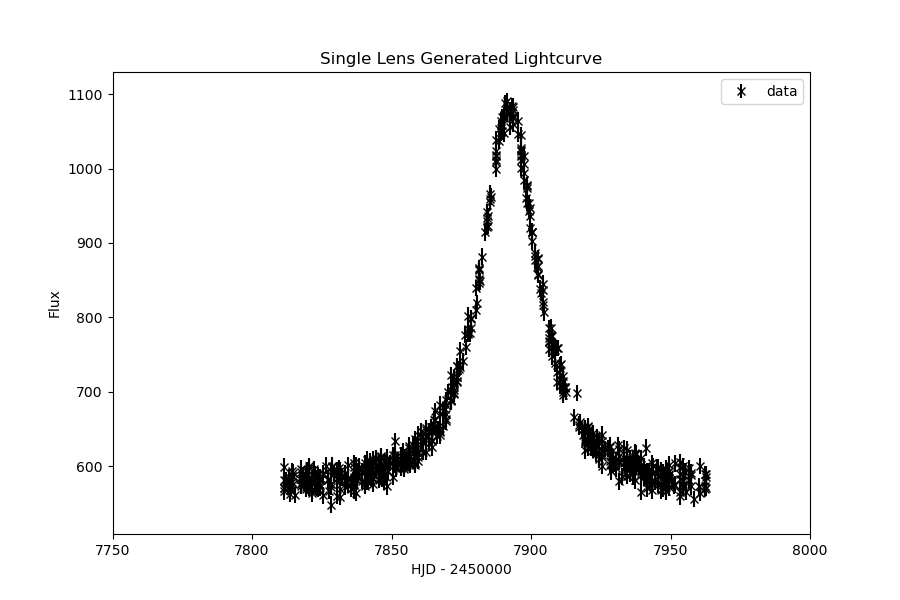

In [126]:
# 1S1L fit
def generate_lightcurve(SL, u0, t0, tE, FS, FB, sig, t=None, trange=None):
    """
    Generate lightcurve for given parameters and epochs or date range.
    
    Parameters:
    - u0: Impact parameter
    - t0: Time of closest approach
    - tE: Einstein radius crossing time
    - FS: Source flux
    - FB: Blend flux
    - sig: Standard deviation of Gaussian errors
    - t: Array of epochs (optional)
    - trange: date range (optional)
        - tstart: Start of date range
        - tfinish: End of date range
    
    Returns:
    - t_data: Generated time points
    - flux_data: Generated flux data with noise
    - flux_err_data: Gaussian errors
    """
    # Generate epochs if not provided
    if t is None:
        tstart, tfinish = trange
        days = np.arange(np.floor(tstart), np.ceil(tfinish)) # Generate integer days within the range
        t = []
        for day in days:
            if tstart <= day <= tfinish:
                # Generate epochs for the night
                num_epochs = np.random.randint(0, 9)  # Random number of epochs between 0 and 8
                epochs = np.random.choice(np.arange(0.3, 0.6, 0.0104167), size=num_epochs, replace=False)
                t.extend(day + epochs)
    t = np.array(t)
    
    # Generate theoretical flux
    A = SL(u0, t0, tE, t)
    flux_theoretical = A*FS + FB
    
    # Generate Gaussian noise
    noise = np.random.normal(0, sig, size=t.shape)
    
    # Generate noisy flux data
    flux_data = flux_theoretical + noise
    
    # Gaussian errors
    flux_err_data = np.full(t.shape, sig)
    
    return t, flux_data, flux_err_data

# making up event parameters and data stats
sig = 11.2
u0 = 0.4321
t0 = 7892.123
tE = 23.4
FS = 343.21
FB = 231.2

trange = (t0-82, t0+70)

# generating fake data
t_data, flux_data, flux_err_data = generate_lightcurve(SL, u0, t0, tE, FS, FB, sig, trange=trange)

'''# Load the event data from OGLE
t_data = np.loadtxt('Data/OGLE-2017-BLG-0002.txt', usecols=0) - 2450000
mag_data = np.loadtxt('Data/OGLE-2017-BLG-0002.txt', usecols=1)
mag_err_data = np.loadtxt('Data/OGLE-2017-BLG-0002.txt', usecols=2)'''

%matplotlib widget

# Let's start by taking a look at the data
plt.close(1)
plt.figure(figsize=(9,6), num=1)
plt.errorbar(t_data, flux_data, yerr=flux_err_data, fmt='x', color='black', label='data')
plt.xlabel('HJD - 2450000')
plt.ylabel('Flux')
plt.title('Single Lens Generated Lightcurve')
plt.xlim(7750, 8000)
plt.legend()
plt.show()



Below is a function to solve for $F_{\rm S}$ and $F_{\rm B}$.

In [127]:
def calc_Fs(model:np.ndarray, x:np.ndarray, sig2:np.ndarray) -> (float, float):
    '''Solves for the flux parameters for a givin model using least squares.
    
    Parameters:
    -----------
    model: model magnification curve
    x: observed flux values
    sig2: flux errors.
    
    Returns:
    --------
    FS: source flux
    FB: blend flux.
    '''
    #A
    A11 = np.sum(model**2 / sig2)
    Adiag = np.sum(model / sig2) 
    A22 = np.sum(1.0 / sig2)
    A = np.array([[A11,Adiag], [Adiag, A22]])
     
    #C
    C1 = np.sum((x * model) / sig2)
    C2 = np.sum(x / sig2)
    C = np.array([C1, C2]).T
     
    #B
    B = np.linalg.solve(A,C)
    FS = float(B[0])
    FB = float(B[1])
    
    return FS, FB

Okay, now let try fitting our lightcurve.

<style>
.exercise {
    background-color: #E0E0E0;
    border-left: 8px solid #808080;
    padding: 10px 0 10px 20px;  /* top, right, bottom, left */
    margin: 20px 5px;  
    box-sizing: border-box;  
}
.exercise h2 {
    color: #808080;
    font-size: 24px;
}
.exercise p {
    margin: 0 20px;  /* Adjust this value to add space after the paragraph */
}
</style>

<div class="exercise">
    <h2>Exercise 2</h2>
    <p>Make an initial guess at your microlensing parameters (<i>p</i><sub>0</sub>).</p>
    <br>
</div>

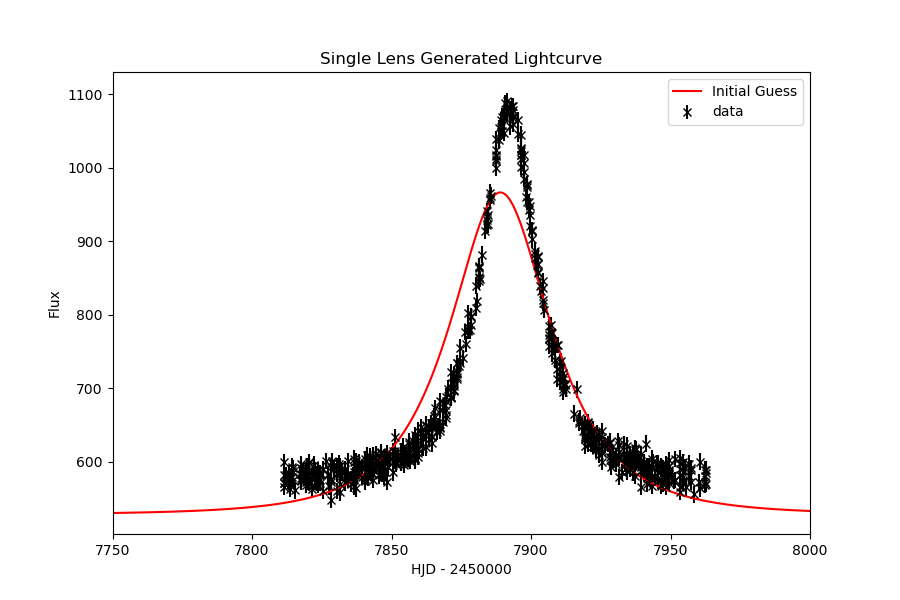

In [128]:
# Initial guess
#u0 = 
#t0 = 
#tE = 

# DELETE THIS!
u0 = 0.7
t0 = 7889
tE = 30
# DELETE THIS!

# magnification model for initial guess chi2
A_0 = SL(u0, t0, tE, t_data)

# Model
t_model = np.linspace(7750, 8000, 1000)
A_model = SL(u0, t0, tE, t_model)

p0 = [u0, t0, tE]
FS0, FB0 = calc_Fs(A_0, flux_data, flux_err_data**2)

# Plot
plt.close(2)
plt.figure(figsize=(9,6), num=2)
plt.errorbar(t_data, flux_data, yerr=flux_err_data, fmt='x', color='black', label='data')
plt.plot(t_model, FS0*A_model + FB0, color='red', label='Initial Guess')
plt.xlabel('HJD - 2450000')
plt.ylabel('Flux')
plt.title('Single Lens Generated Lightcurve')
plt.xlim(7750, 8000)
plt.legend()
plt.show()


<style>
.exercise {
    background-color: #E0E0E0;
    border-left: 8px solid #808080;
    padding: 10px 0 10px 20px;  /* top, right, bottom, left */
    margin: 20px 5px;  
    box-sizing: border-box;  
}
.exercise h2 {
    color: #808080;
    font-size: 24px;
}
.exercise p {
    margin: 0 20px;  /* Adjust this value to add space after the paragraph */
}
</style>

<div class="exercise">
    <h2>Exercise 3</h2>
    <p>Write an objective function for the fit.</p>
    <br>
</div>

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 4.843270440483117
             x: [ 4.526e-01  7.892e+03  2.273e+01]
           nit: 164
          nfev: 296
 final_simplex: (array([[ 4.526e-01,  7.892e+03,  2.273e+01],
                       [ 4.526e-01,  7.892e+03,  2.273e+01],
                       [ 4.526e-01,  7.892e+03,  2.273e+01],
                       [ 4.526e-01,  7.892e+03,  2.273e+01]]), array([ 4.843e+00,  4.843e+00,  4.843e+00,  4.843e+00]))


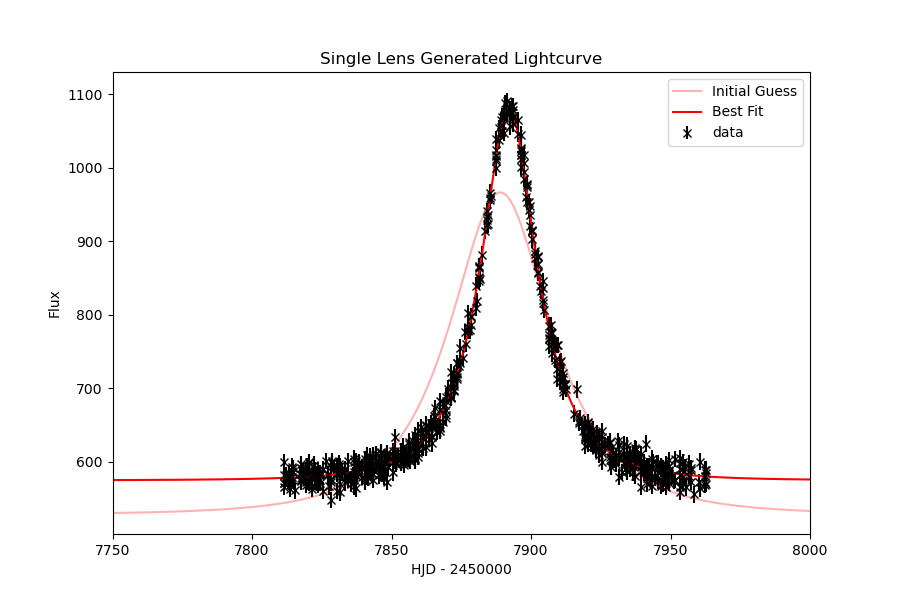

In [129]:
# Let's fit the data

def chi2(p, t, f, sig):
    '''Calculates the chi squared value for a given model and parameters.
    
    Parameters:
    -----------
    p: parameters
    t: data epochs
    f: observed flux values
    sig: flux errors
    
    Returns:
    --------
    chi2: chi squared value.
    '''

    # DELETE THIS!
    sig2 = sig**2
    model = SL(p[0], p[1], p[2], t)
    FS, FB = calc_Fs(model, f, sig2)
    chi2_value = np.sum(((FS*model + FB - f) / sig2)**2)
    # DELETE THIS!

    return chi2_value

result = minimize(chi2, p0, args=(t_data, flux_data, flux_err_data), method='Nelder-Mead')
popt = result.x
print(result)

# Model
A_model_opt = SL(popt[0], popt[1], popt[2], t_model)  # model line for best fit parameters
A_opt = SL(popt[0], popt[1], popt[2], t_data)  # model flux values for best fit parameters
FS_opt, FB_opt = calc_Fs(A_opt, flux_data, flux_err_data**2)  # best fit flux parameters

# Plot
plt.close(3)
plt.figure(figsize=(9,6), num=3)

plt.errorbar(t_data, flux_data, yerr=flux_err_data, fmt='x', color='black', label='data')
plt.plot(t_model, FS0*A_model + FB0, color='red', label='Initial Guess', alpha=0.3)
plt.plot(t_model, FS_opt*A_model_opt + FB_opt, color='red', label='Best Fit')
plt.xlabel('HJD - 2450000')
plt.ylabel('Flux')
plt.title('Single Lens Generated Lightcurve')
plt.xlim(7750, 8000)
plt.legend()
plt.show()

Great job! 

Did you get fit parameters similar to those you put in to the generate_lightcurve function?

If not, maybe you should take another look at you $\chi^2$ function.

If you fit looks good, let try and quantify how much better it was than the initial guess. Given the assumptions we mentioned earlier out Gaussianity and on-dimensional data uncertainties, the relative probability that our model produced the data is

$$ \mathcal{L} = e^{-\Delta\chi^2/2}. $$

<style>
.exercise {
    background-color: #E0E0E0;
    border-left: 8px solid #808080;
    padding: 10px 0 10px 20px;  /* top, right, bottom, left */
    margin: 20px 5px;  
    box-sizing: border-box;  
}
.exercise h2 {
    color: #808080;
    font-size: 24px;
}
.exercise p {
    margin: 0 20px;  /* Adjust this value to add space after the paragraph */
}
</style>

<div class="exercise">
    <h2>Exercise 4</h2>
    <p>How much more probable is it that your fitted parameters produced the lightcurve than your initial guess parameters?</p>
    <br>
</div>


In [ ]:
# Do your calculation here

Let try that again with some real data.

In [130]:
def mag2flux(mag, zp=25.0):
    '''Converts magnitude values (array) to flux.
    
    Parameters:
    -----------
    mag: array of magnitudes
    zp: zero point of the magnitude system.

    Returns:
    --------
    f: array of fluxes.
    '''
    f = 10.0**((mag - zp) / -2.5)
    return f

def mag2flux_err(mag, mag_err, zp=25.0):
    '''Converts magnitude values and errors (array) to flux using error propagation formula.
    
    Parameters:
    -----------
    mag: array of magnitudes
    mag_err: array of magnitude errors
    zp: zero point of the magnitude system.

    Returns:
    --------
    flux_err: array of flux errors.
    '''
    dfdmag = -0.4 * np.log(10) * 10.**(0.4*(zp-mag))
    flux_err = np.sqrt(dfdmag**2*mag_err**2)
    return flux_err

# Data directory
data_dir = 'Data/Events/OB170002/'

def read_data(dir:str) -> dict:
    '''Reads in the data from a directory.
    
    Parameters:
    -----------
    dir: directory path
    
    Returns:
    --------

    dict: dictionary containing the data.
        observatory key: (t_data, flux_data, flux_err_data)
            t_data: time data
            mag_data: magnitude data
            ßmag_err_data: magnitude error data
    '''
    
    # Ali I am still writting this function. Use your own data.
    
    return t_data, mag_data, mag_err_data

flux_data = mag2flux(mag_data)
flux_err_data = mag2flux_err(mag_data, mag_err_data)
print(np.std(flux_err_data))

3.207837284240911


<style>
.exercise {
    background-color: #E0E0E0;
    border-left: 8px solid #808080;
    padding: 10px 0 10px 20px;  /* top, right, bottom, left */
    margin: 20px 5px;  
    box-sizing: border-box;  
}
.exercise h2 {
    color: #808080;
    font-size: 24px;
}
.exercise p {
    margin: 0 20px;  /* Adjust this value to add space after the paragraph */
}
</style>

<div class="exercise">
    <h2>Exercise 5</h2>
    <p>Fit a point-source 1S1L model to event OB170002?</p>
    <br>
    <p><i>Note that each data set requires individual F</i><sub>S</sub><i> and F</i><sub>B</sub><i> parameters in order to be comparable to the unifying magnification curve, which is borne of the physical, lensing configuration and thus is not data set specific.</i></p>
    <p><i>Here, "data set" refers to lightcurve data, for a given event, reduced using the same method, from the same observatory and field, imaged in the same band.</i></p>
    <br>
</div>

In [ ]:
# Your code here

You can find further point-source exercises, in this paramerterisation [here](https://www.microlensing-source.org/concept/point-lenses/).

## Free Microlensing Codes

If data fitted to a point source 1L1S model shows signs of deviations from the model, a binary lens, binary source, and/or higher-order effect model needs to be considered in an attempt to describe these deviations.

While creating a 1S1L function is a fairly trivial process, these more complicated models are not. It is usefull to be familiar with the freely available codes one can employ to fit such models. As an example, lets use [MuLens]() to create a 1L1S model magnification curves with finite source effects (i.e., a finite-source 1L1S model)

In [2]:
# Add the trajectory/LC figure code here

## Alternate parameterisation

While the above parameterisation is the most commonly used parameterisation for a point-source 1S1L model, there are other parameterisation we can employ that are suited to different purposes.

Albrow paper -- for early altering of events.